Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../data/v4/Handballprojekt_1Liga fertig.xlsx")

file.sheet_names

df = file.parse('1. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]


/Users/nayansavaliya/Desktop/HandballGameAnalysis/hba-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','playTime',
              'homeGoals','opponentGoals','throwSuccess','whistleThrowTime',
              'LRHandy','throwDirection','goalKeeperPosition',
              'goalKeeperName', 'goalKeeperHeightCM','shooterheightCM',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16','goalKeeperName':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,homeGoals,opponentGoals,throwSuccess,whistleThrowTime,LRHandy,throwDirection,goalKeeperPosition,goalKeeperName,goalKeeperHeightCM,shooterheightCM,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,19.0,9.0,9.0,1.0,18.0,2.0,7.0,1.0,Heinevetter,194.0,186.0,0.0,1.0,NaN,NaN
1,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,32.0,17.0,16.0,1.0,20.0,2.0,9.0,1.0,Heinevedtter,194.0,186.0,0.0,2.0,7.0,1.0
2,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,40.0,22.0,18.0,1.0,44.0,2.0,8.0,1.0,Vujovic,196.0,186.0,1.0,3.0,9.0,1.0
3,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,46.0,27.0,22.0,0.0,21.0,2.0,4.0,1.0,Vujovic,196.0,186.0,0.0,4.0,8.0,1.0
4,Rhein-Neckar Löwen,SC Magdeburg,2.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.loc[:,('name','throwDirection','throwSuccess')].copy()
df.dropna(inplace=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)

df1 =pd.crosstab(df['name'], df['throwDirection'], margins=True, margins_name="Total") 
df1

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Eckberg,4,5,12,2,0,0,33,5,19,80
Lindberg,24,1,8,4,2,1,23,13,19,95
Magnusson,27,1,18,7,0,1,36,21,24,135
Total,55,7,38,13,2,2,92,39,62,310


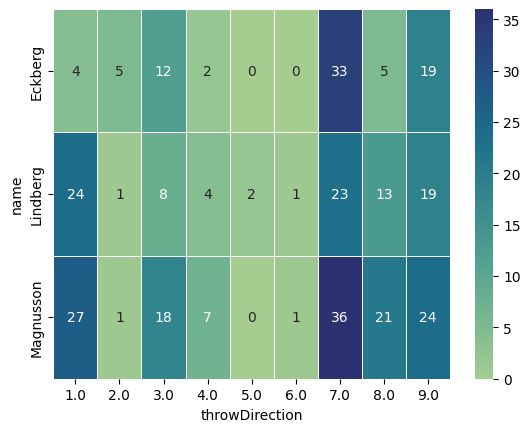

In [5]:
ax = sns.heatmap(pd.crosstab(df['name'], df['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

In [6]:
df2 =pd.crosstab(df['name'], df['throwSuccess']) 
df2

throwSuccess,0.0,1.0
name,,
Eckberg,14,66
Lindberg,6,89
Magnusson,27,108


In [7]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess              0.0  1.0
name      throwDirection          
Eckberg   1.0               1    3
          2.0               2    3
          3.0               1   11
          4.0               1    1
          7.0               4   29
          8.0               1    4
          9.0               4   15
Lindberg  1.0               0   24
          2.0               0    1
          3.0               1    7
          4.0               0    4
          5.0               0    2
          6.0               1    0
          7.0               1   22
          8.0               2   11
          9.0               1   18
Magnusson 1.0               4   23
          2.0               0    1
          3.0               5   13
          4.0               3    4
          6.0               0    1
          7.0               8   28
          8.0               5   16
          9.0               2   22

In [8]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess              0.0  1.0
name      throwDirection          
Eckberg   1.0               1    3
          2.0               2    3
          3.0               1   11
          4.0               1    1
          7.0               4   29
          8.0               1    4
          9.0               4   15
Lindberg  1.0               0   24
          2.0               0    1
          3.0               1    7
          4.0               0    4
          5.0               0    2
          6.0               1    0
          7.0               1   22
          8.0               2   11
          9.0               1   18
Magnusson 1.0               4   23
          2.0               0    1
          3.0               5   13
          4.0               3    4
          6.0               0    1
          7.0               8   28
          8.0               5   16
          9.0               2   22

Playerwise Successfull Throw

In [9]:
dfs = df.loc[df['throwSuccess'] == 1]
dfs
dfscs =pd.crosstab(dfs['name'], dfs['throwDirection'], margins=True, margins_name="Total") 
dfscs

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Eckberg,3,3,11,1,0,0,29,4,15,66
Lindberg,24,1,7,4,2,0,22,11,18,89
Magnusson,23,1,13,4,0,1,28,16,22,108
Total,50,5,31,9,2,1,79,31,55,263


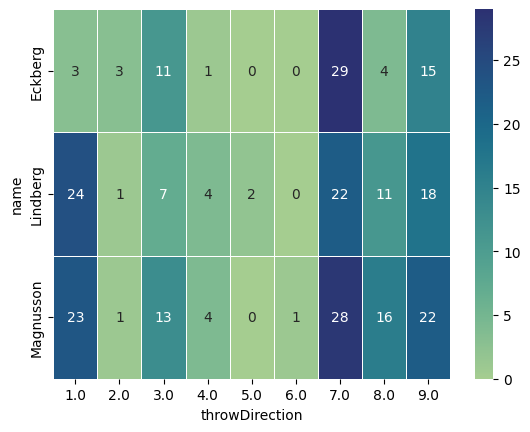

In [10]:
axs = sns.heatmap(pd.crosstab(dfs['name'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Playerwise Failed Throws

In [11]:
dff = df.loc[df['throwSuccess'] == 0]
dff
dffcs =pd.crosstab(dff['name'], dff['throwDirection'], margins=True, margins_name="Total") 
dffcs

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
Eckberg,1,2,1,1,0,4,1,4,14
Lindberg,0,0,1,0,1,1,2,1,6
Magnusson,4,0,5,3,0,8,5,2,27
Total,5,2,7,4,1,13,8,7,47


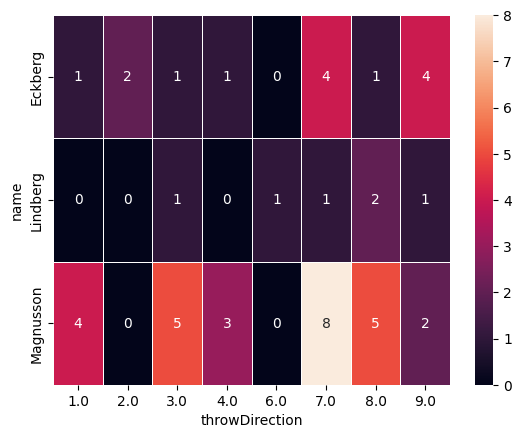

In [12]:
axf = sns.heatmap(pd.crosstab(dff['name'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

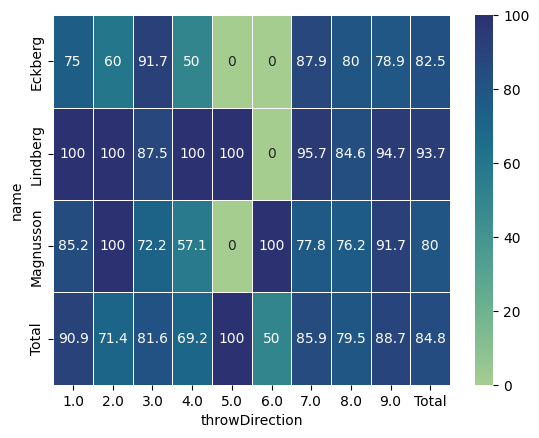

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Eckberg,75.000000,60.000000,91.666667,50.000000,0.0,0.0,87.878788,80.000000,78.947368,82.500000
Lindberg,100.000000,100.000000,87.500000,100.000000,100.0,0.0,95.652174,84.615385,94.736842,93.684211
Magnusson,85.185185,100.000000,72.222222,57.142857,0.0,100.0,77.777778,76.190476,91.666667,80.000000
Total,90.909091,71.428571,81.578947,69.230769,100.0,50.0,85.869565,79.487179,88.709677,84.838710


In [13]:
relSuccess = dfscs/df1*100
relSuccess.apply(np.floor)
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess